# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems

A  classification is where you try to classify something as one thing or another
* binary classification
* Multiclass classification
* Multilable classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y =  make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#  Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


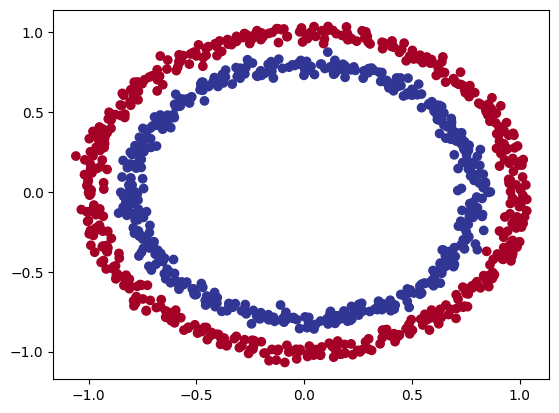

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate
7. Tweak
8. Evaluate...

In [9]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2.  Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.5962 - accuracy: 0.4430
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.5100
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5210
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4850


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's performing as it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# set the random seed
tf.random.set_seed(42)

#1. Create a model, this time with 2 layers
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X,y )

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932737231254578, 0.5]

In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we migh want to add more layers or increase the hidden units within a layer.
2. Compiling a model - here we migh to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate a model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.4980


[0.699493944644928, 0.49799999594688416]

Whenever your model is performing strangely or there is something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inspect your model predictions.

To visualize our model predictions, let's create a function `plot_decision_boundary()`, this function will:


* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resource:
  - cs231n neural networks case study
  - Made with ML
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+ 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together


  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multicass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [18]:
import matplotlib.pyplot as plt

313/313 [==============================] - 0s 838us/step
doing binary classification


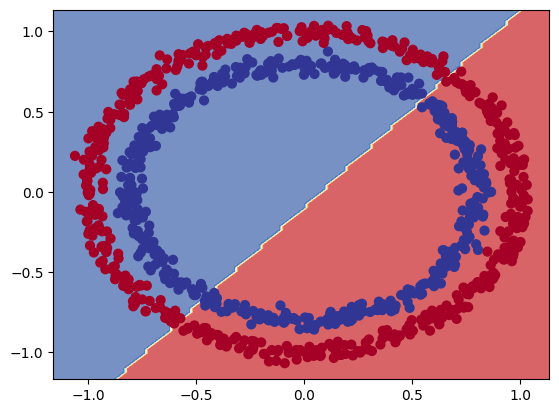

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [20]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y =  X + 100

# Split our regression data into training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data

model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

But...we're now working on a regression problem, let's change our model to suit our data.

In [21]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 483.8319 - mae: 483.8319
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 363.7083 - mae: 363.7083
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 248.1965 - mae: 248.1965
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 128.2009 - mae: 128.2009
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 50.9730 - mae: 50.9730
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 87.8974 - mae: 87.8974
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 74.2223 - mae: 74.2223
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 44.4069 - mae: 44.4069
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 52.4945 - mae: 52.4945
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.4816 - mae: 42.4816
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 3ms/step


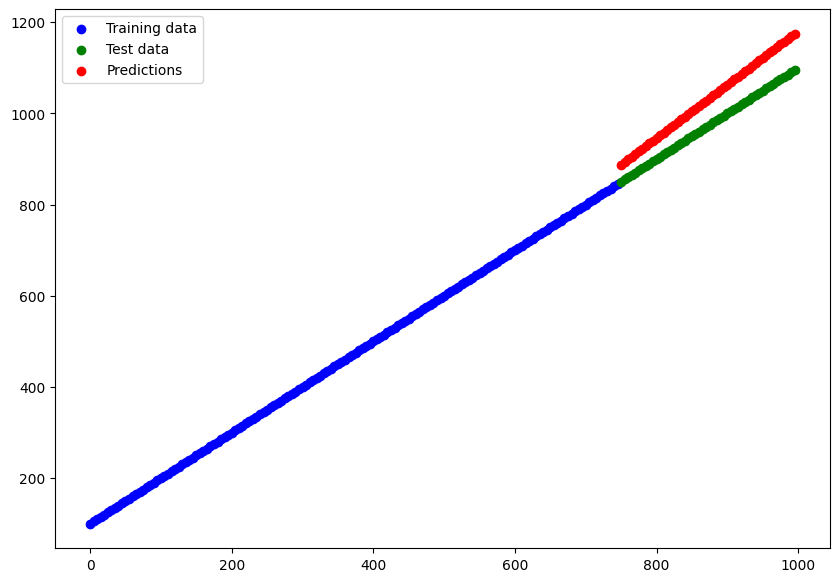

In [22]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's prediction against  our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

# The missing piece: Non-linearity

In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8202 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7960 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7587 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7541 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7416 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7387 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 995us/step - loss: 5.7284 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6773 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6233 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 991us/step - loss: 5.6071 - accuracy: 0.4820
Epoch

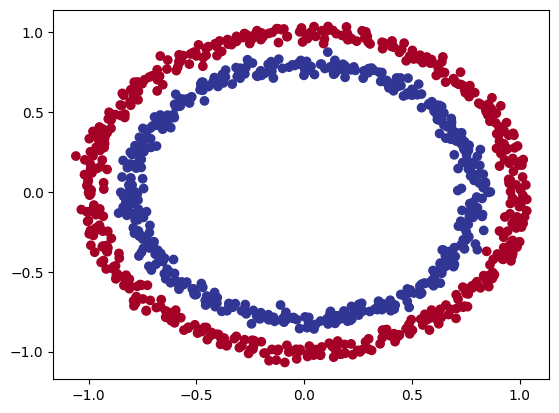

In [24]:
# Check out our data

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 834us/step
doing binary classification


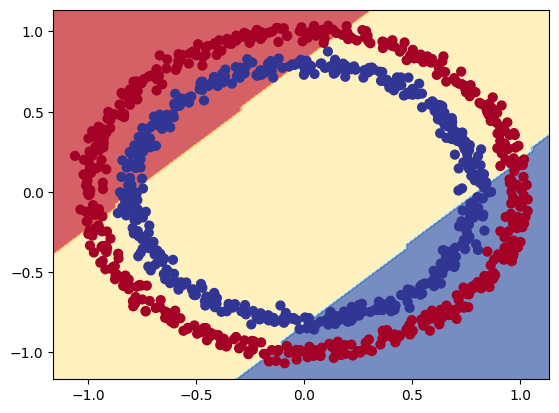

In [25]:
# Check out the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

# Let's try build our first neural network with a non-linear activation funciton.

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)

])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 5.3220 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.2863 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.2660 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.2247 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1788 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1622 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1159 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.9566 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6908 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6072 - accuracy: 0.4720
Epoch 11/

In [27]:
# Time to replicate the multi-layer neural network from playground tensorflow in code.

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. fit our model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 0.9651 - accuracy: 0.4100
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8803 - accuracy: 0.3960
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8267 - accuracy: 0.3520
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8003 - accuracy: 0.3160
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7843 - accuracy: 0.2770
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7735 - accuracy: 0.2380
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7657 - accuracy: 0.2660
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7611 - accuracy: 0.2580
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.2730
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7536 - accuracy: 0.2860
Epoch 11/

In [28]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 915us/step - loss: 0.0409 - accuracy: 0.9870


[0.04092874005436897, 0.9869999885559082]

313/313 [==============================] - 0s 852us/step
doing binary classification


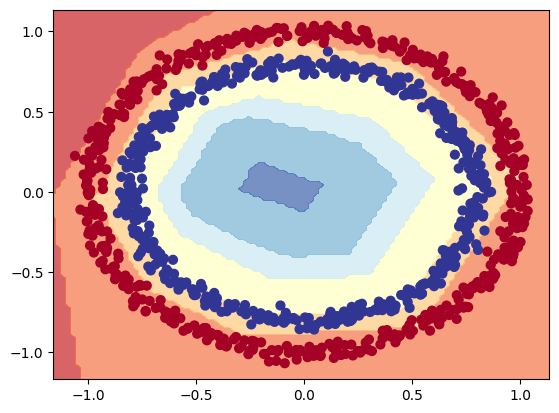

In [29]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [30]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile
model_7.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6977 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4040
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4120
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.3680
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.3920
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4780
Epoch 11/

In [31]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.9290


[0.45344266295433044, 0.9290000200271606]

313/313 [==============================] - 0s 780us/step
doing binary classification


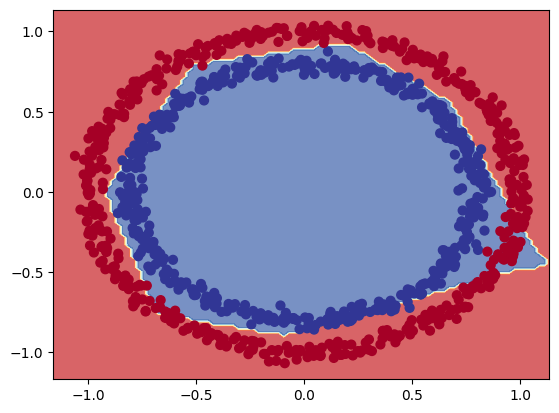

In [32]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Question:** what's wrong with the predictions we've made? Are we really evaluating our model correctly?


**Note:** The combinasion of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action

In [33]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

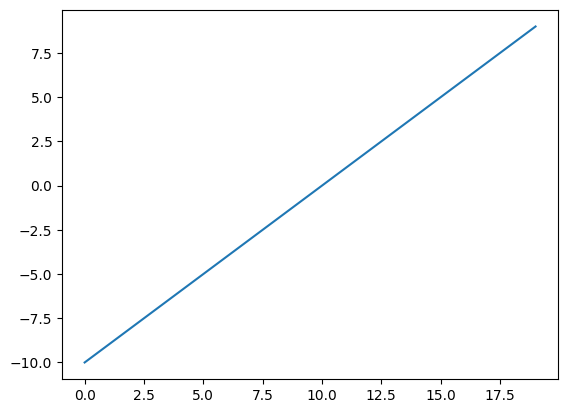

In [34]:
# Visualize our toy tensor
plt.plot(A)

In [35]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1+tf.exp(-x))


# Use our sigmoi function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

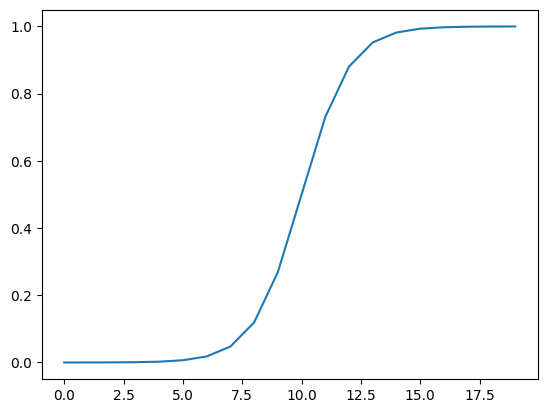

In [36]:
plt.plot(sigmoid(A))

In [37]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Let's pass our toy tensor into our relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

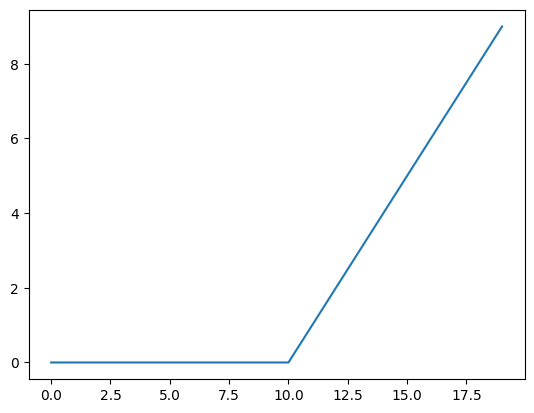

In [38]:
plt.plot(relu(A))

In [39]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

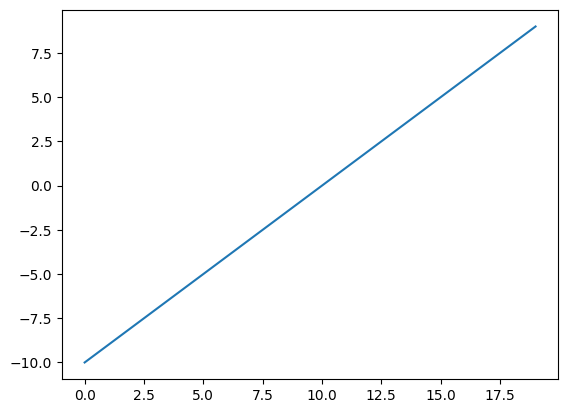

In [40]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [41]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [42]:
# Check how many examples we have
len(X)

1000

In [43]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [44]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test= X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.6876 - accuracy: 0.5275
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.5888
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5525
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.6637
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.6538
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6007 - accuracy: 0.7300
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.8037
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.8350
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.9087
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.9550
Epoch 11/25
25/25 [

In [46]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9850


[0.08012083172798157, 0.9850000143051147]

313/313 [==============================] - 0s 769us/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


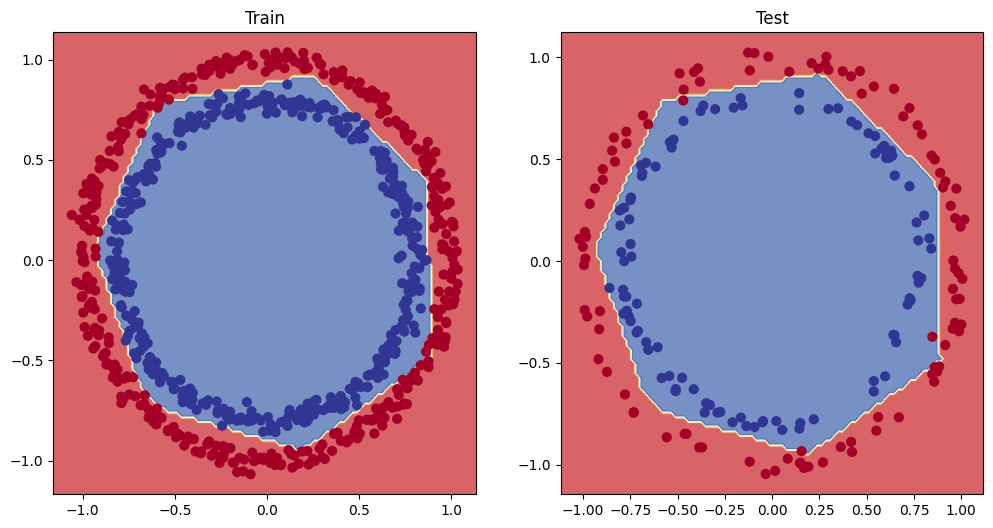

In [47]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

# Let's see how we can plot the loss (or training) curves


In [48]:
# Convert the history into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.687605,0.52750
1,0.679232,0.58875
2,0.669419,0.55250
3,0.656458,0.66375
4,0.632141,0.65375
5,0.600706,0.73000
6,0.542074,0.80375
7,0.488392,0.83500
8,0.421773,0.90875
9,0.350598,0.95500


Text(0.5, 1.0, 'Model_8 loss curves')

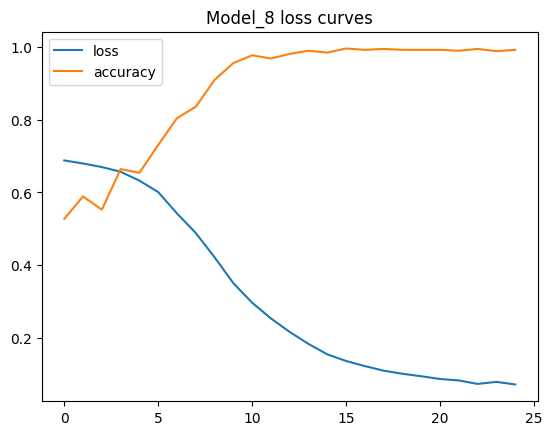

In [49]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the idea learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A leanring rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model **while** it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [50]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Create a leanring rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7159 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7150 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7140 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7130 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7120 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7098 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7088 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

<Axes: xlabel='epochs'>

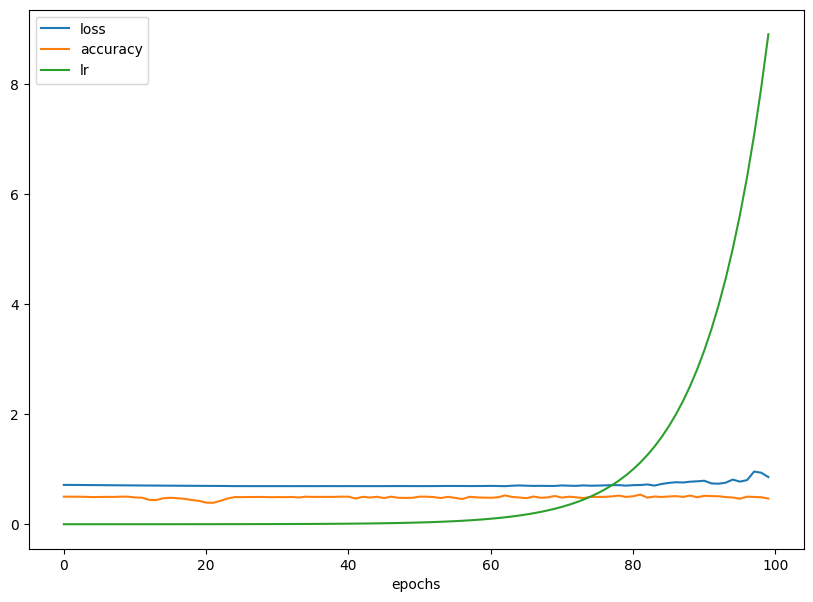

In [51]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

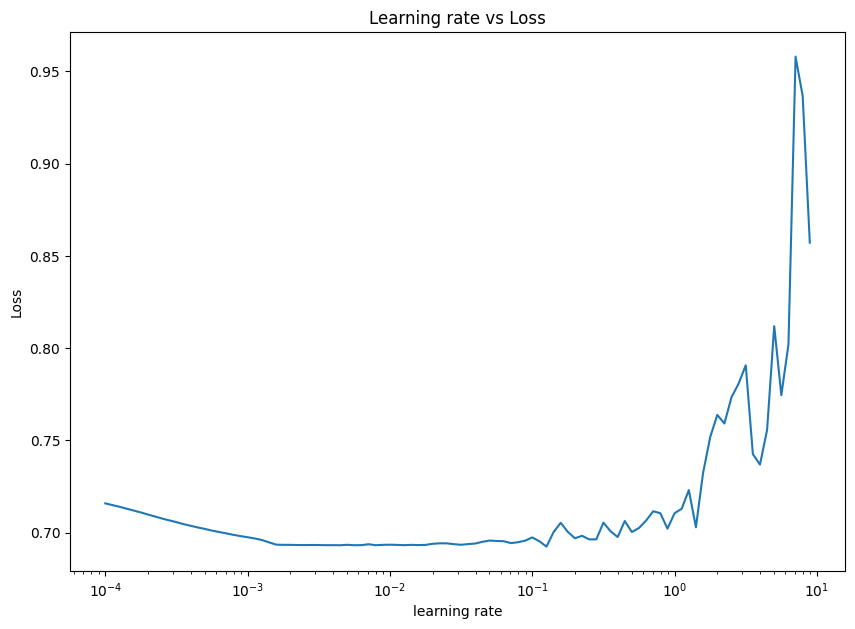

In [52]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [53]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [54]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])


# fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6967 - accuracy: 0.4938
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5487
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.5987
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.6988
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.7025
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.7200
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 0.7825
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.8037
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.9312
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2872 - accuracy: 0.9800
Epoch 11/20
25/25 [

In [55]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.9950


[0.03374920412898064, 0.9950000047683716]

In [56]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9850


[0.08012083172798157, 0.9850000143051147]

313/313 [==============================] - 0s 856us/step
doing binary classification
313/313 [==============================] - 0s 832us/step
doing binary classification


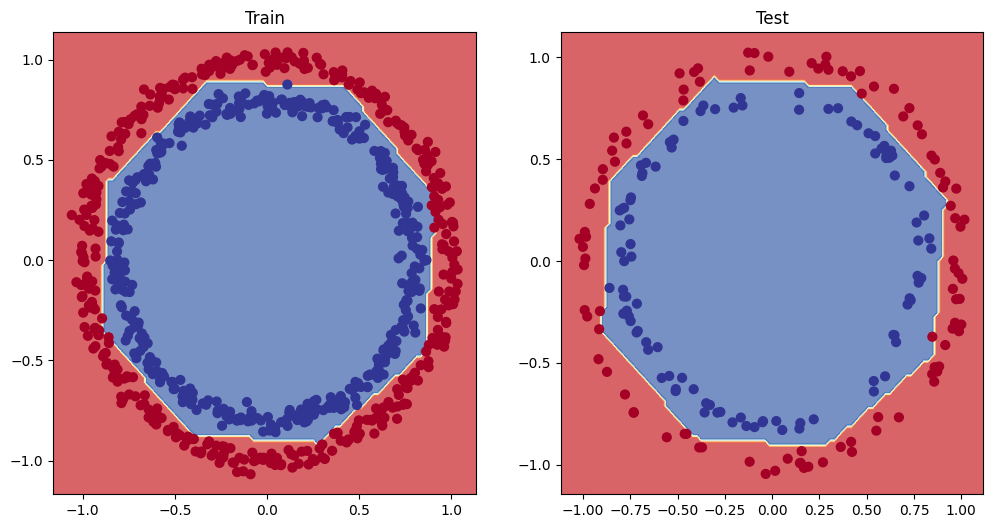

In [57]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are handful of other classification methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [58]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9950
Model loss on the test set:0.03374920412898064
Model accuracy on the test set:99.50%


How about a confusion matrix

In [59]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [60]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [61]:
y_preds[:10]

array([[0.995011  ],
       [0.99740076],
       [0.9978848 ],
       [0.99884146],
       [0.33371007],
       [0.00748086],
       [0.9798333 ],
       [0.00305256],
       [0.9966084 ],
       [0.02147681]], dtype=float32)

Looks like our predictions array has come out in **prediciton probability** form... the standard output from sigmoid (or softmax)
activation functions.

In [62]:
# Convert our prediction probabilities to binary format and view the first 10

tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [63]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

How about we prettify our confusion matrix?

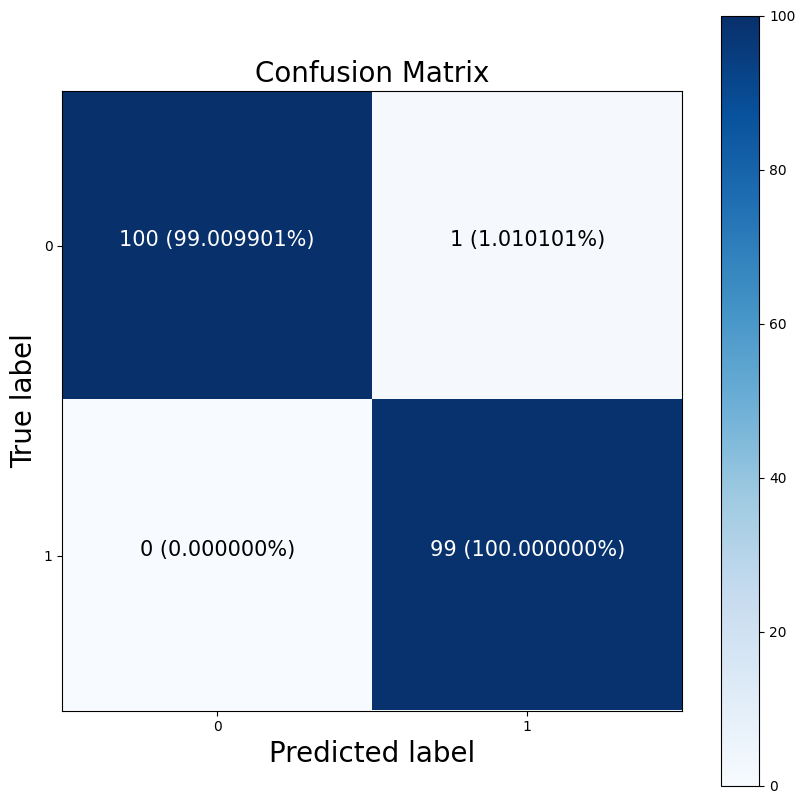

In [64]:
# Note:  the confusion matrix code we're about to write is a remix of scikit-learn's plot confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:np.newaxis] # normalize our confusion matrix
n_classes =  cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a lager example (multiclass classification)

When you have more than two classses as an option, it's known as **multi-class classifcation**.

* This means if you have 3 different classes, it's multiclass classification.
* It also means if you have 100 different classes, it's multi-class classification.


To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test set for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [66]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

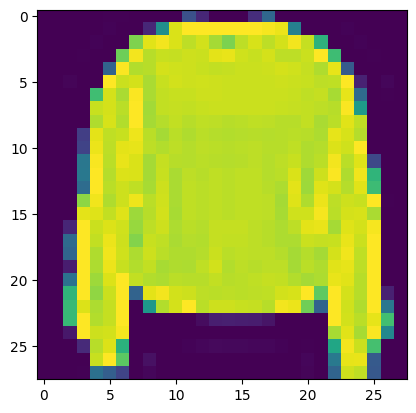

In [68]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [69]:
# Check out samples label
train_labels[7]

2

In [71]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

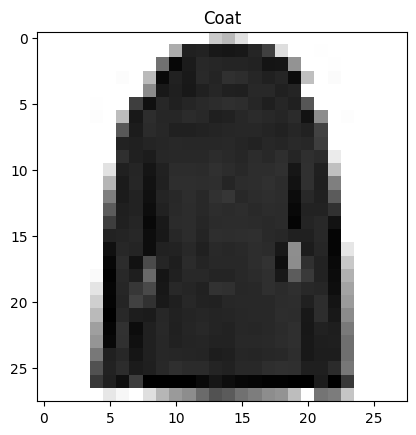

In [75]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

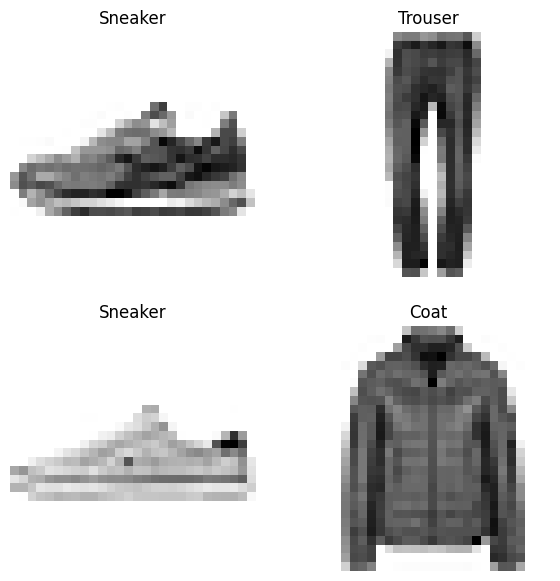

In [92]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

For our multi-class classification model, we can use a similar architechture to our binary classifiers, however, we're going to have a to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
 * if your labels are one-hot encoded, use CategoricalCrossentropy()
 * if your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)


In [97]:
# Our data needs to be flattened (from 28*28 to None,784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [100]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [101]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2772 - accuracy: 0.1382 - val_loss: 2.1369 - val_accuracy: 0.1655
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8431 - accuracy: 0.2618 - val_loss: 1.6704 - val_accuracy: 0.2940
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6234 - accuracy: 0.3230 - val_loss: 1.5658 - val_accuracy: 0.3444
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5565 - accuracy: 0.3453 - val_loss: 1.5313 - val_accuracy: 0.3530
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5430 - accuracy: 0.3480 - val_loss: 1.5324 - val_accuracy: 0.3474
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5290 - accuracy: 0.3490 - val_loss: 1.5213 - val_accuracy: 0.3523
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5234 - accuracy: 0.3529 - val_loss: 1.5082 - val_accuracy:

In [102]:
# Check the model summary
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
# Check the min and max of our training data
train_data.min(), train_data.max()

(0, 255)

Neural network prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0&1.


In [105]:
# We can get our training and our testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data/ 255.0
test_data_norm = test_data/ 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [106]:
# set seed
tf.random.set_seed(42)

# create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])


# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0419 - accuracy: 0.6071 - val_loss: 0.6925 - val_accuracy: 0.7583
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6347 - accuracy: 0.7834 - val_loss: 0.6378 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5793 - accuracy: 0.8005 - val_loss: 0.5900 - val_accuracy: 0.7952
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5528 - accuracy: 0.8095 - val_loss: 0.5758 - val_accuracy: 0.8017
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5378 - accuracy: 0.8143 - val_loss: 0.5602 - val_accuracy: 0.8081
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5269 - accuracy: 0.8175 - val_loss: 0.5537 - val_accuracy: 0.8153
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5175 - accuracy: 0.8199 - val_loss: 0.5729 - val_accuracy:

### **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized(numbers between 0 & 1)

<Axes: title={'center': 'Normalized data'}>

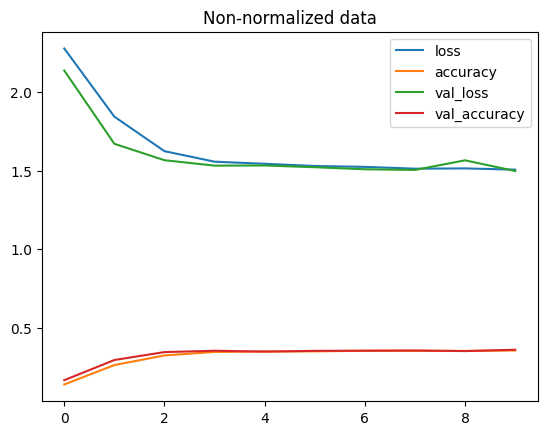

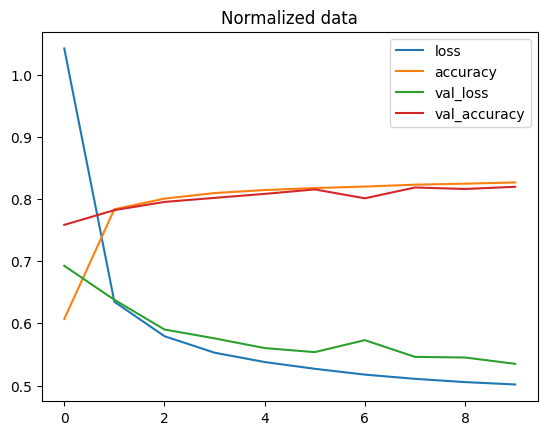

In [107]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

### **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architechture but different data or same data but different architechture)

## Finding the ideal learning rate

In [111]:
# Set the random
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3385 - accuracy: 0.4884 - val_loss: 1.0808 - val_accuracy: 0.6082 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9740 - accuracy: 0.6533 - val_loss: 0.8503 - val_accuracy: 0.7213 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7204 - accuracy: 0.7630 - val_loss: 0.6940 - val_accuracy: 0.7733 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6485 - accuracy: 0.7842 - val_loss: 0.6638 - val_accuracy: 0.7829 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6269 - accuracy: 0.7885 - val_loss: 0.6623 - val_accuracy: 0.7765 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6149 - accuracy: 0.7909 - val_loss: 0.6571 - val_accuracy: 0.7845 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'Find the ideal learning rate')

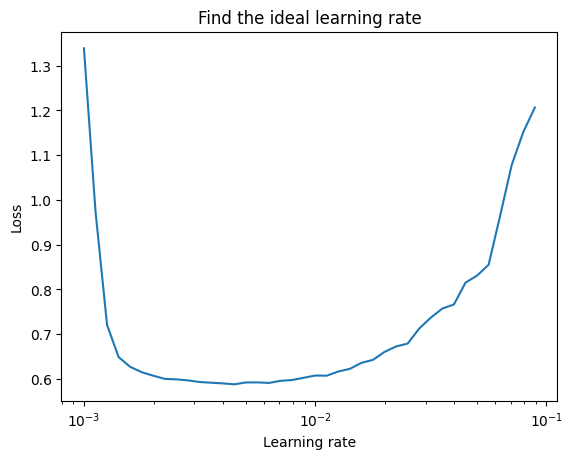

In [112]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs= 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Find the ideal learning rate")

In [113]:
10 **-3


0.001

In [117]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)


# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4281 - accuracy: 0.4808 - val_loss: 0.9750 - val_accuracy: 0.6538
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8875 - accuracy: 0.6861 - val_loss: 0.8533 - val_accuracy: 0.7036
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8072 - accuracy: 0.7184 - val_loss: 0.8093 - val_accuracy: 0.7193
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7668 - accuracy: 0.7331 - val_loss: 0.7777 - val_accuracy: 0.7290
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7378 - accuracy: 0.7421 - val_loss: 0.7540 - val_accuracy: 0.7403
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7013 - accuracy: 0.7527 - val_loss: 0.7253 - val_accuracy: 0.7472
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6720 - accuracy: 0.7647 - val_loss: 0.6947 - val_accuracy:

# Evaluete our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architechture )
* Save and export it for use in an application
Let's go through the top 2...

In [132]:
 # Create a confusion matrix

 import itertools
 from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.range(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Set threshold on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=text_size)

In [119]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [123]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "predictions probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 886us/step


array([[3.00361620e-07, 3.73865507e-04, 2.09551967e-08, 2.94494498e-11,
        6.30542161e-08, 1.60338938e-01, 2.06872059e-07, 7.79322684e-02,
        3.36809792e-02, 7.27673292e-01],
       [2.15434065e-05, 1.01465796e-08, 8.96353781e-01, 8.10616285e-09,
        2.29618587e-02, 5.31519055e-02, 2.73853354e-02, 1.38953409e-08,
        1.25625214e-04, 2.81757662e-09],
       [7.82500287e-10, 9.98201072e-01, 2.43455638e-08, 1.08212735e-04,
        1.69015653e-03, 4.44269962e-34, 6.28354826e-07, 2.49770101e-38,
        5.92764837e-10, 2.77588289e-31],
       [1.33576872e-09, 9.98752236e-01, 1.12303624e-08, 3.57786135e-04,
        8.89473304e-04, 5.17345120e-34, 5.14714429e-07, 9.02690126e-38,
        1.26902255e-09, 1.88851443e-30],
       [7.70427063e-02, 1.18666896e-04, 3.74970287e-01, 3.68057028e-03,
        5.01348227e-02, 1.10016583e-04, 4.83212560e-01, 9.36819390e-07,
        1.07280761e-02, 1.26701502e-06]], dtype=float32)

**Note:** remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you want to make predictions on normalized data).

In [127]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.0036162e-07, 3.7386551e-04, 2.0955197e-08, 2.9449450e-11,
        6.3054216e-08, 1.6033894e-01, 2.0687206e-07, 7.7932268e-02,
        3.3680979e-02, 7.2767329e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [128]:
# Convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [129]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[759,   2,  17,  88,   7,   0, 110,   0,  17,   0],
       [  1, 940,   2,  34,  12,   0,  10,   0,   1,   0],
       [ 21,   4, 588,  10, 222,   0, 148,   0,   7,   0],
       [ 58,  28,   6, 794,  31,   0,  77,   0,   6,   0],
       [  0,  14,  95,  25, 790,   0,  74,   0,   2,   0],
       [  1,   0,   0,   0,   0, 932,   2,  44,   4,  17],
       [209,   3, 187,  52, 200,   0, 329,   0,  20,   0],
       [  0,   0,   0,   0,   0,  58,   0, 890,   0,  52],
       [  5,   1,  12,   9,   3,   4,  25,   3, 937,   1],
       [  0,   0,   0,   0,   0,  30,   0,  37,  10, 923]])

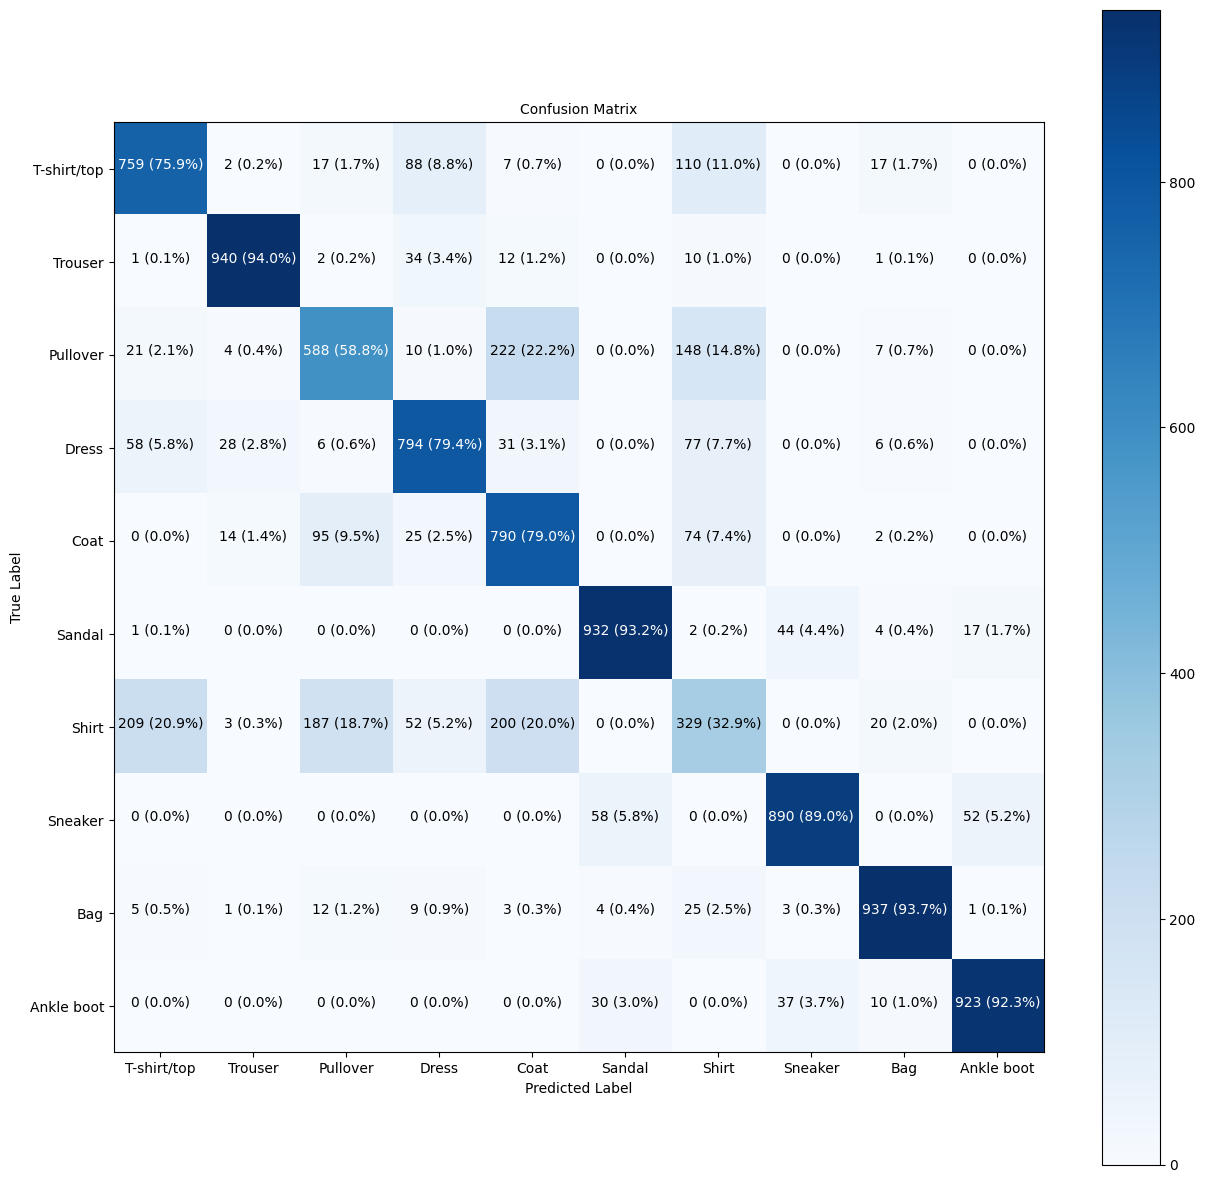

In [134]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a futher understanding of the data and the inputs and outputs of your models.

How about we create a little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [141]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up a random interger
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color="green"
  else:
    color="red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred:{} {:2.0f}% (True: {})". format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 17ms/step


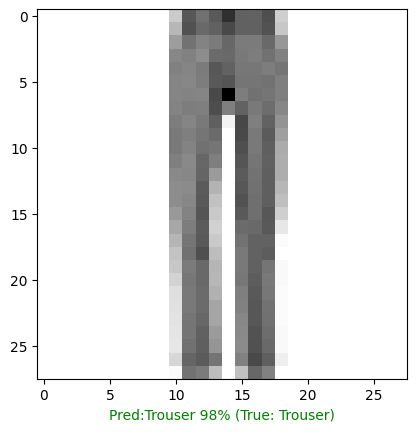

In [165]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning?

In [166]:
 # Find the layers of our most recent model
 model_14.layers

In [167]:
# Extract a particular layer
model_14.layers[1]

In [169]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.7801549 ,  0.39288366, -0.06621824, -0.8323582 ],
        [-0.6014391 ,  0.80936927,  0.59015775, -0.66524607],
        [ 0.6696337 ,  0.7506316 ,  0.4958623 , -0.92883855],
        ...,
        [-0.66500354,  0.15905917, -0.38753155,  0.09662015],
        [-0.48733953,  0.934644  , -0.6082552 , -0.07953606],
        [ 0.25384152,  0.28498897, -0.78521556, -0.03257333]],
       dtype=float32),
 (784, 4))

In [170]:
model_14.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 4)                 3140      
                                                                 
 dense_60 (Dense)            (None, 4)                 20        
                                                                 
 dense_61 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [171]:
# Now let's check out the bias vector...
biases, biases.shape

(array([-0.4638843 ,  1.1956507 ,  3.495626  , -0.19285136], dtype=float32),
 (4,))

# Every neuron has a bias vector. Each of these is paired with a weights matrix.

# The bias vector get initialized as zeros (at least in the case of a tensorflow dense layer).

# The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [172]:
model_14.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 4)                 3140      
                                                                 
 dense_60 (Dense)            (None, 4)                 20        
                                                                 
 dense_61 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


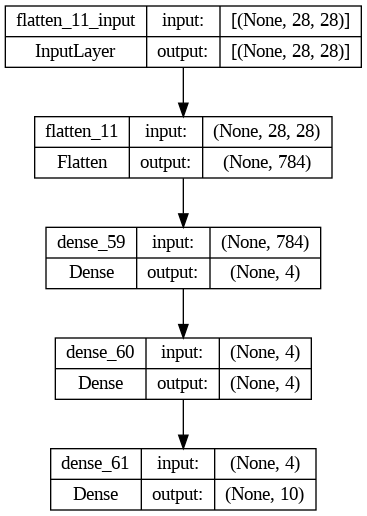

In [174]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)